<a href="https://colab.research.google.com/github/MeikoFudo/Contests_and_bootcamps/blob/main/Iris_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd 

In [85]:
import tensorflow as tf

if tf.test.is_gpu_available():
    print("GPU is available for use")
else:
    print("GPU is not available for use")

with tf.device("/GPU:0"):
    pass

GPU is available for use


In [86]:
df = pd.read_csv('/content/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [88]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [89]:
df.shape

(150, 6)

In [90]:
df['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="dark")

def Scatter_plot(x, y):
    sns.scatterplot(x=df[x], y=df[y], hue=df["Species"], data=df)
    plt.title("Scatter plot for the iris dataset")
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

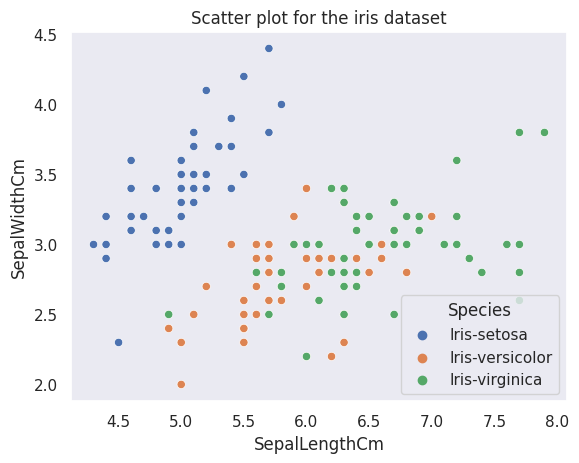

In [92]:
Scatter_plot("SepalLengthCm", "SepalWidthCm")

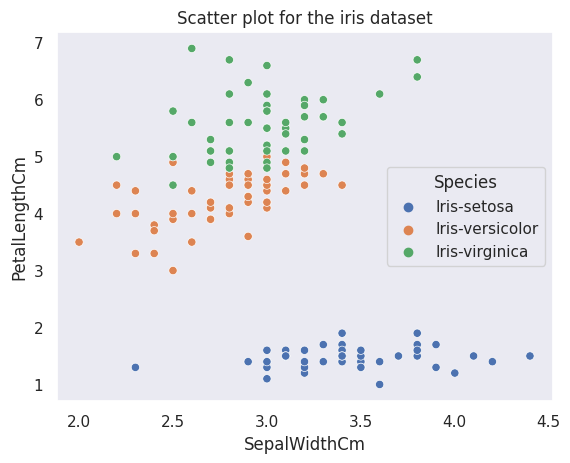

In [93]:
Scatter_plot("SepalWidthCm", 	"PetalLengthCm")

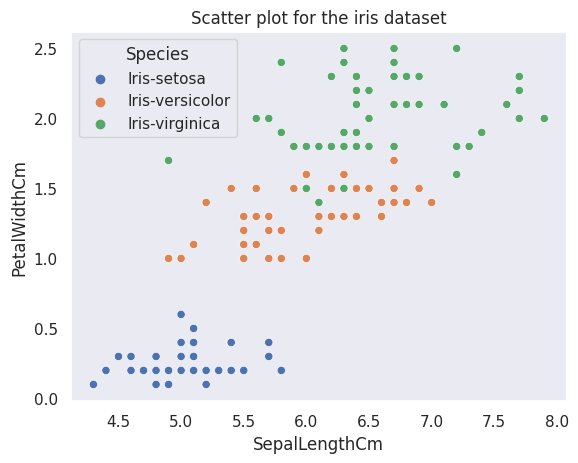

In [94]:
Scatter_plot("SepalLengthCm", "PetalWidthCm")

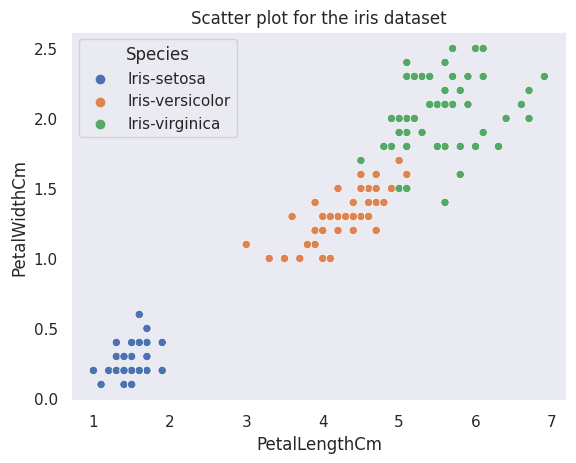

In [95]:
Scatter_plot("PetalLengthCm", "PetalWidthCm")

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

def KDE_plot(x):
  sns.kdeplot(data=df, x=x, hue="Species")
  plt.suptitle("Histograms of variable distributions in the iris dataset")
  plt.xlabel(x)
  plt.ylabel("Density")
  plt.show()

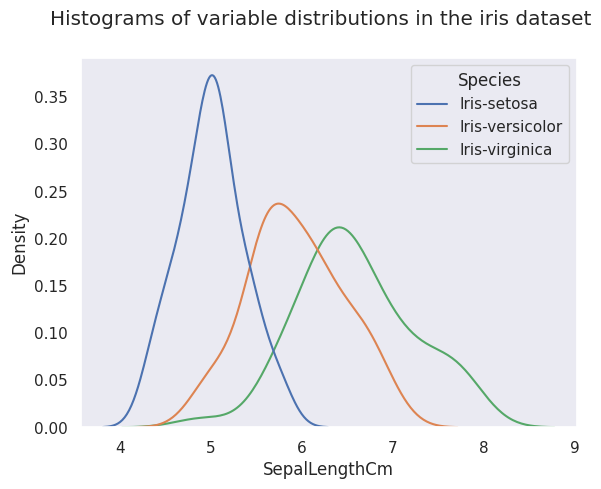

In [97]:
KDE_plot("SepalLengthCm")

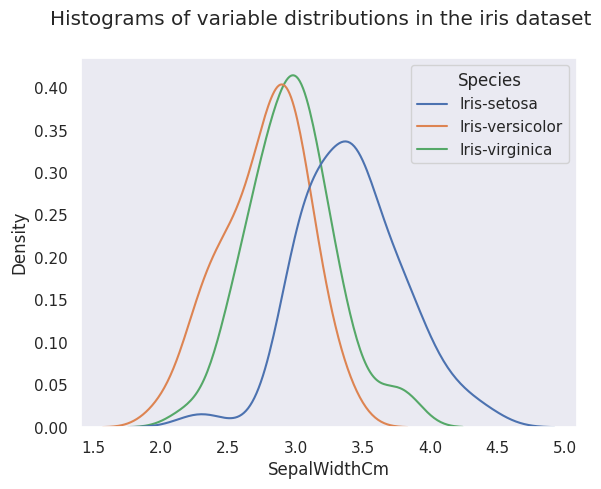

In [98]:
KDE_plot("SepalWidthCm")

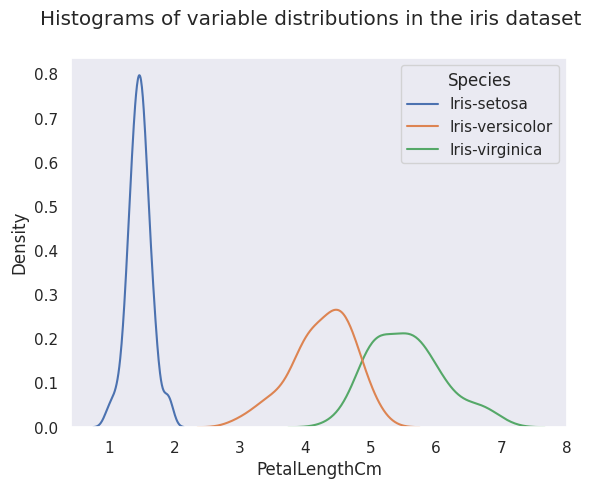

In [99]:
KDE_plot("PetalLengthCm")

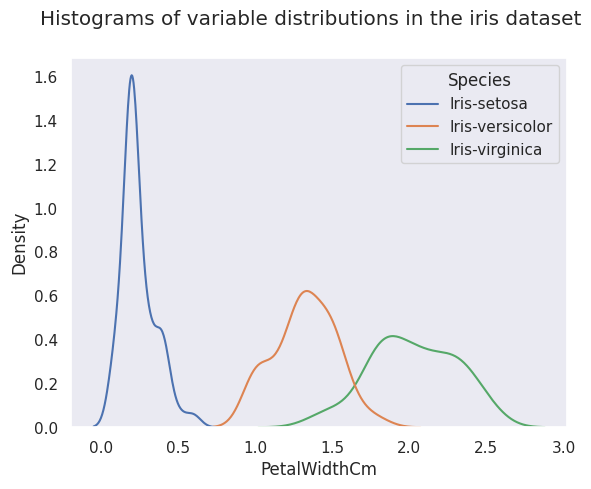

In [100]:
KDE_plot("PetalWidthCm")

In [101]:
df_corr = df
df_corr = df.drop(["Id", "Species"], axis=1)
df_corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


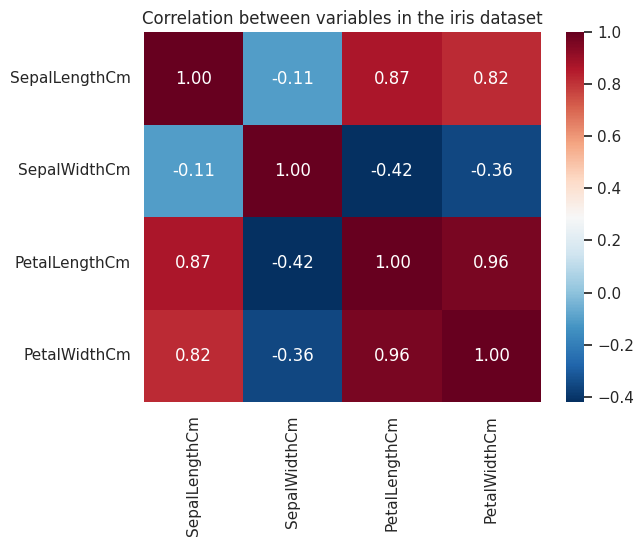

In [102]:
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, cmap="RdBu_r", annot=True, fmt=".2f")
plt.title("Correlation between variables in the iris dataset")
plt.show()

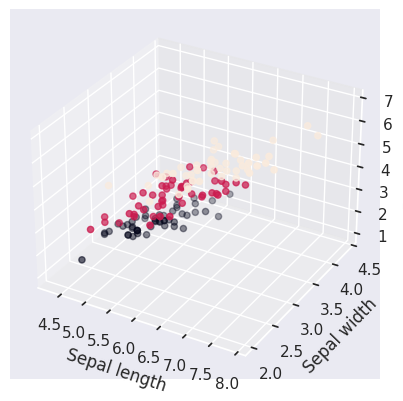

In [103]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

df['Species_num'], _ = pd.factorize(df['Species'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['SepalLengthCm'], df['SepalWidthCm'], df['PetalLengthCm'], c=df['Species_num'])

ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')

plt.show()

In [104]:
import plotly.express as px
fig = px.box(data_frame=df, x='Species',y='SepalLengthCm',color='Species',color_discrete_sequence=['#29066B','#7D3AC1','#EB548C'],orientation='v')
fig.show()

In [105]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
Species_num      0
dtype: int64

In [106]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
species_encoded = encoder.fit_transform(df[['Species']]).toarray()
data = pd.concat([df.drop(['Species'], axis=1), pd.DataFrame(species_encoded)], axis=1)

In [107]:
from sklearn.preprocessing import StandardScaler

df_without_species = df.drop('Species', axis=1)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_without_species)
iris_df_scaled = pd.DataFrame(df_scaled, columns=df_without_species.columns)

iris_df_scaled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species_num
0,-1.720542,-0.900681,1.032057,-1.341272,-1.312977,-1.224745
1,-1.697448,-1.143017,-0.124958,-1.341272,-1.312977,-1.224745
2,-1.674353,-1.385353,0.337848,-1.398138,-1.312977,-1.224745
3,-1.651258,-1.506521,0.106445,-1.284407,-1.312977,-1.224745
4,-1.628164,-1.021849,1.263460,-1.341272,-1.312977,-1.224745
...,...,...,...,...,...,...
145,1.628164,1.038005,-0.124958,0.819624,1.447956,1.224745
146,1.651258,0.553333,-1.281972,0.705893,0.922064,1.224745
147,1.674353,0.795669,-0.124958,0.819624,1.053537,1.224745
148,1.697448,0.432165,0.800654,0.933356,1.447956,1.224745


In [108]:
X = iris_df_scaled

Text(0, 0.5, 'WCSS')

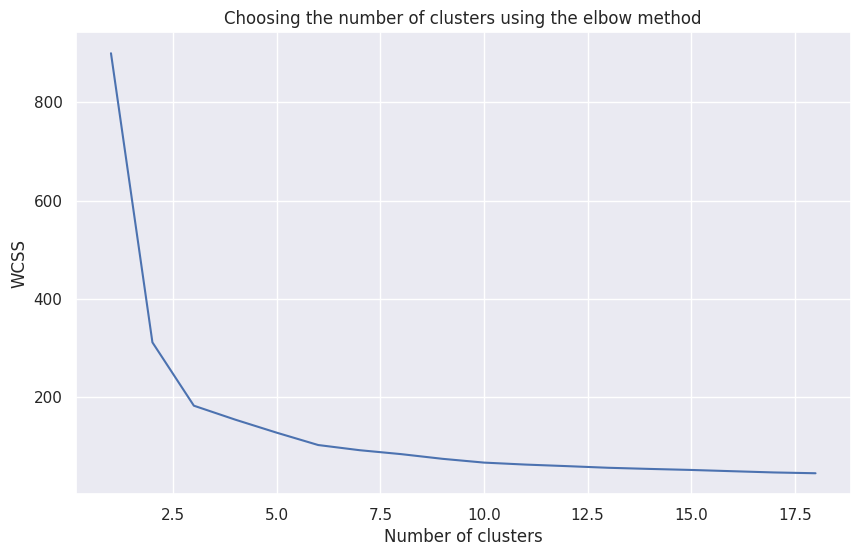

In [109]:
from sklearn.cluster import KMeans
 
wcss = []
 
for i in range(1, 19):
    
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)
 
    kmeans.fit(X)
 
    wcss.append(kmeans.inertia_)
 
plt.figure(figsize = (10,6))
plt.plot(range(1, 19), wcss)
plt.grid()
plt.title('Choosing the number of clusters using the elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [110]:
kmeans =KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 42)

In [111]:
X = iris_df_scaled

In [112]:
y_pred = kmeans.fit_predict(X)

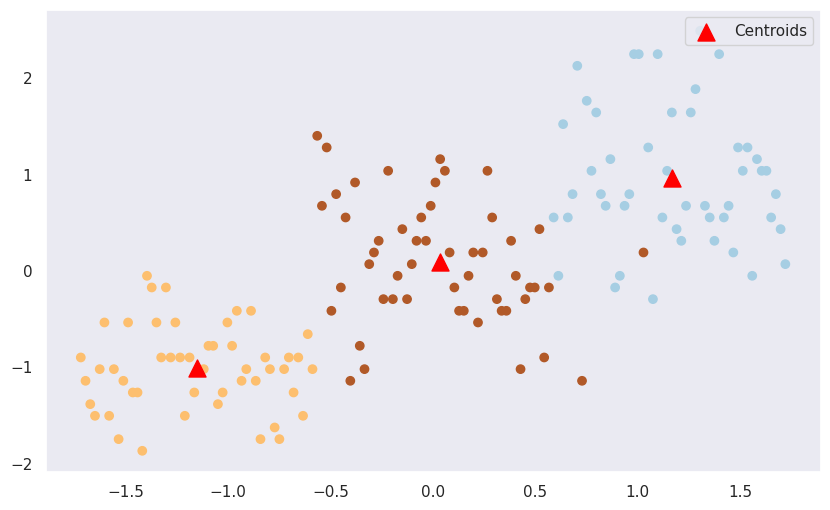

In [113]:
plt.figure(figsize = (10,6))
 
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y_pred, cmap='Paired')
 
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 150, c = 'red', marker = '^', label = 'Centroids')
 
plt.legend(loc = 'upper right')

In [114]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(X, kmeans.labels_)
inertia_score = kmeans.inertia_

print(f"Average silhouette score: {silhouette_avg:.3f}")

Average silhouette score: 0.509
